In [2]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   --------------- ------------------------ 112.6/294.9 kB 1.3 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings("ignore")
random.seed(42)
sns.set_style('darkgrid')

In [5]:
data = pd.read_csv(r'D:\New folder\Global_AI_Content_Impact_Dataset.csv')
data.head(10)


,Country,Year,Industry,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Top AI Tools Used,Consumer Trust in AI (%)
0,South Korea,2022,Media,44.29,33.09,16.77,46.12,74.79,Bard,40.77
1,China,2025,Legal,34.75,66.74,46.89,52.46,26.17,DALL-E,35.67
2,USA,2022,Automotive,81.06,96.13,10.66,45.60,39.66,Stable Diffusion,54.47
3,France,2021,Legal,85.24,93.76,27.70,78.24,29.45,Claude,51.84
4,France,2021,Gaming,78.95,45.62,17.45,1.05,21.70,Midjourney,41.77
5,USA,2021,Retail,66.95,47.72,0.86,27.58,64.42,ChatGPT,68.14
6,Australia,2023,Media,68.23,6.14,6.20,53.13,53.16,Claude,71.60
7,UK,2023,Gaming,91.27,33.87,41.67,56.26,59.93,ChatGPT,46.98
8,Canada,2025,Education,17.02,87.77,4.59,52.45,64.72,Claude,60.55
9,China,2025,Healthcare,25.50,18.74,15.07,40.81,64.86,Stable Diffusion,51.07


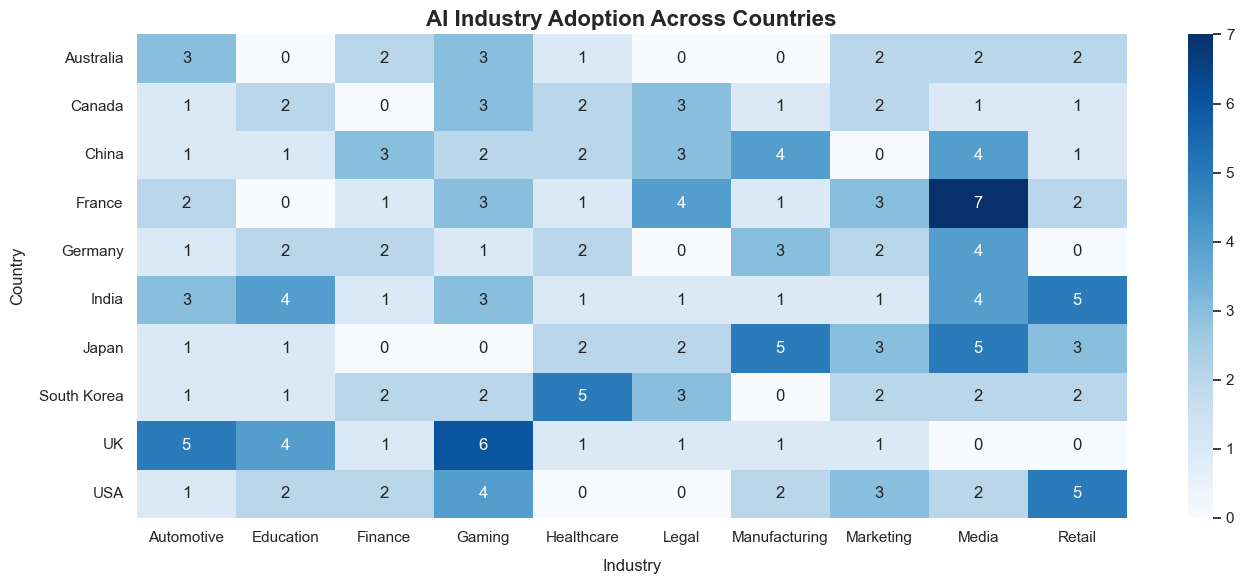

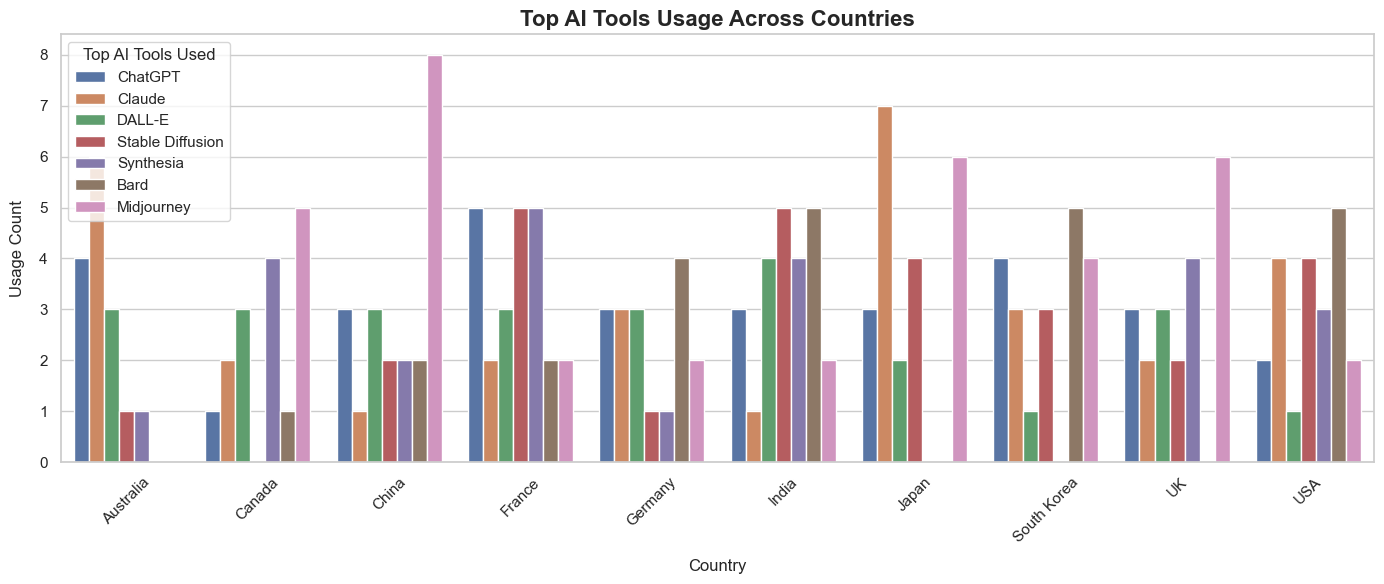

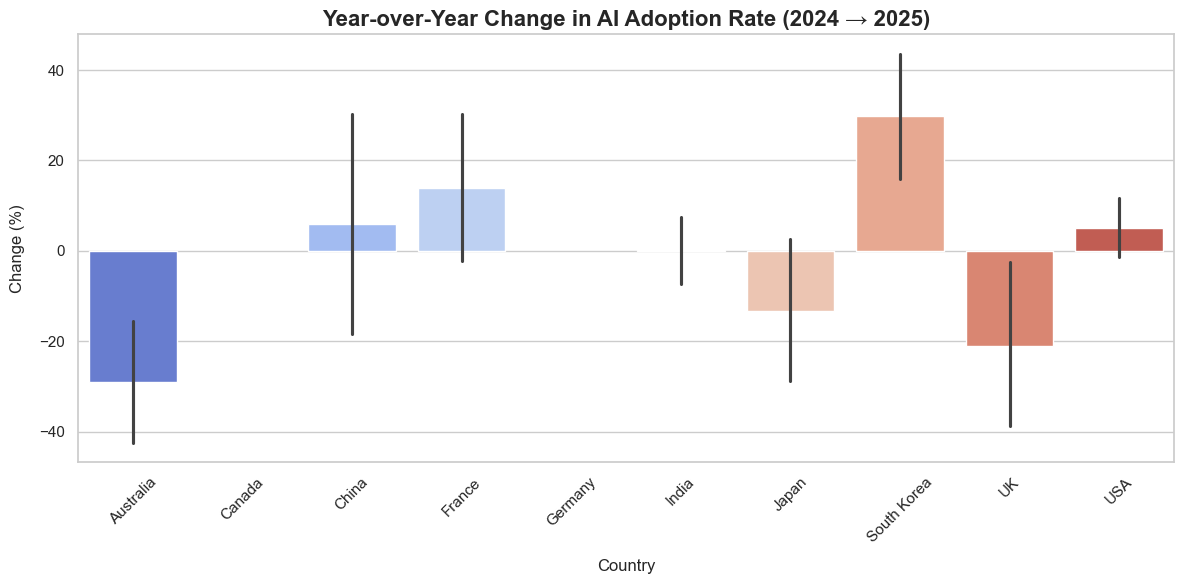

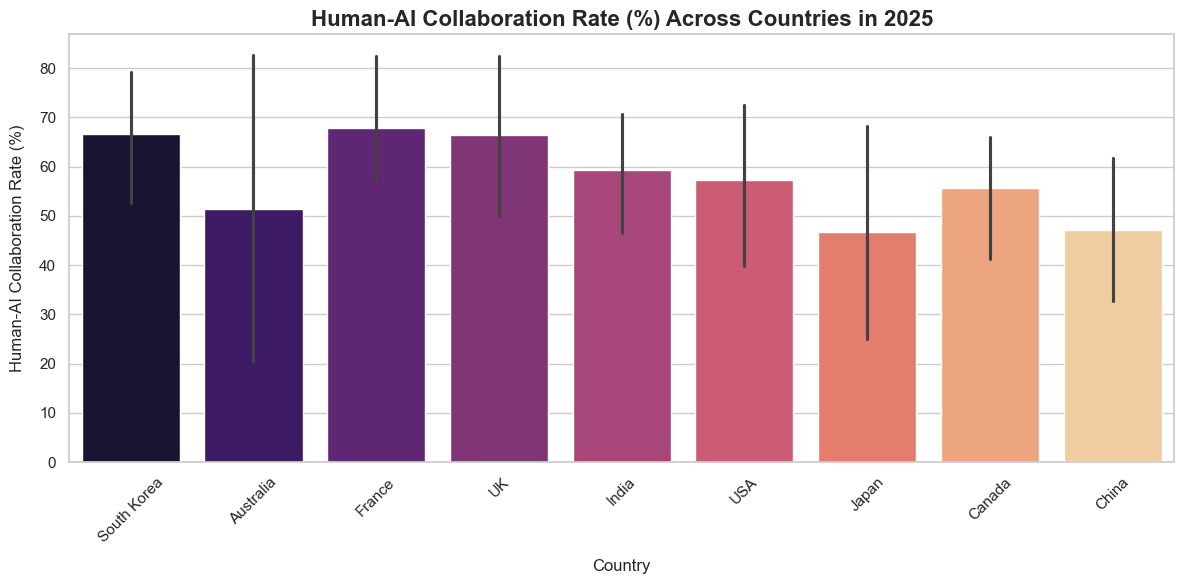

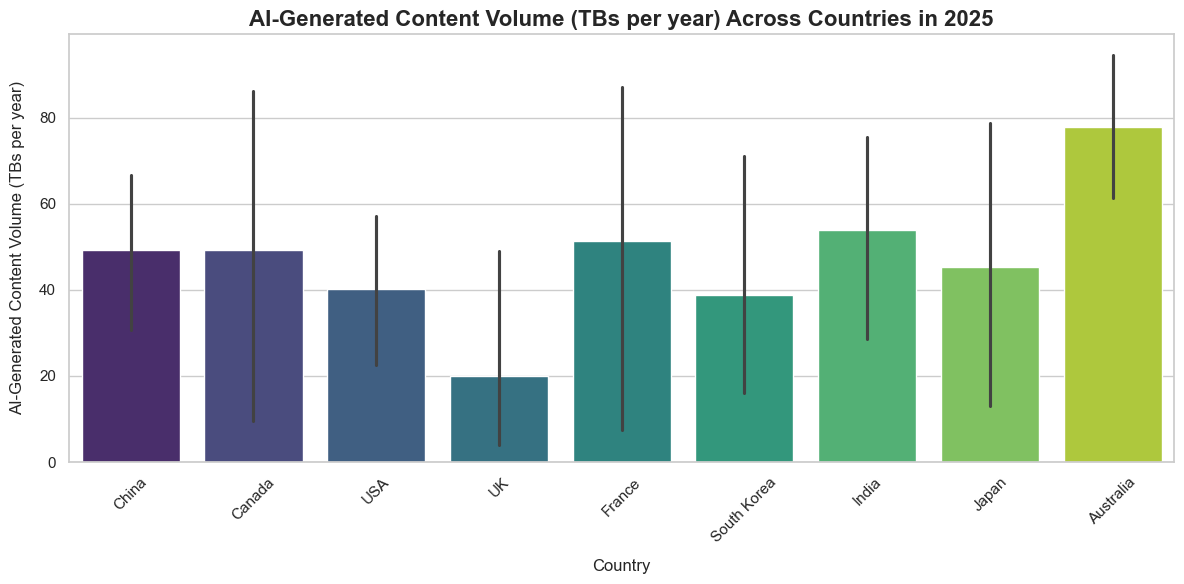

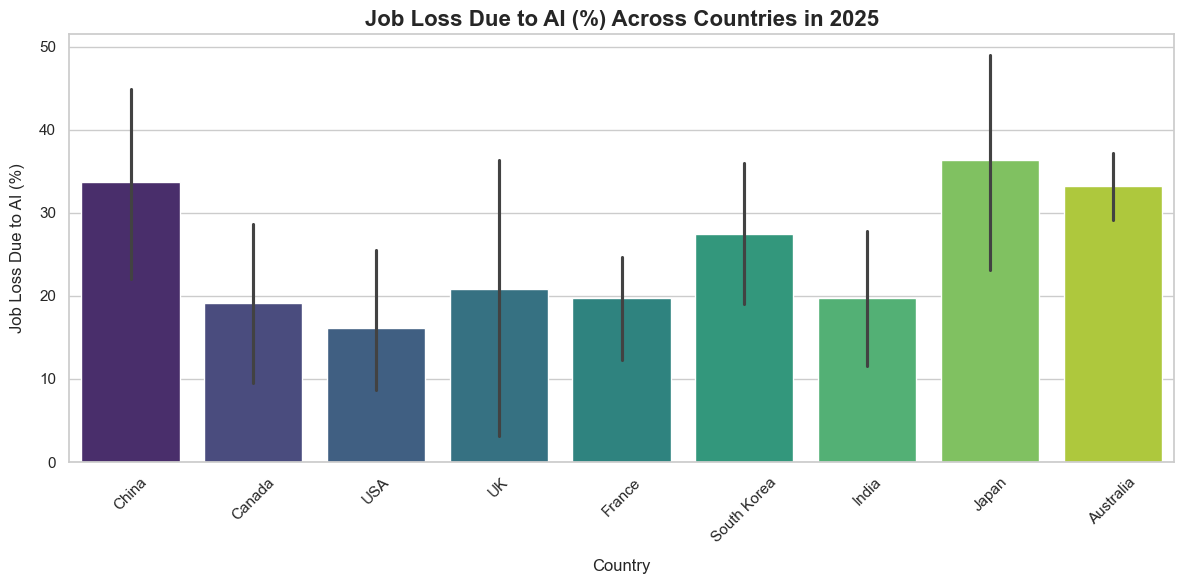

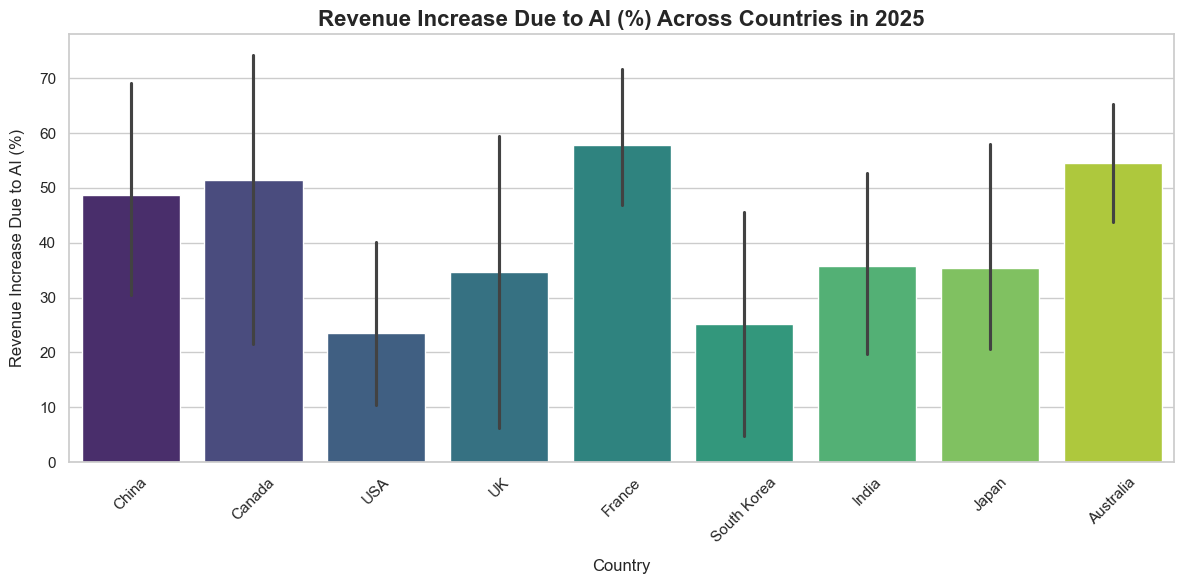

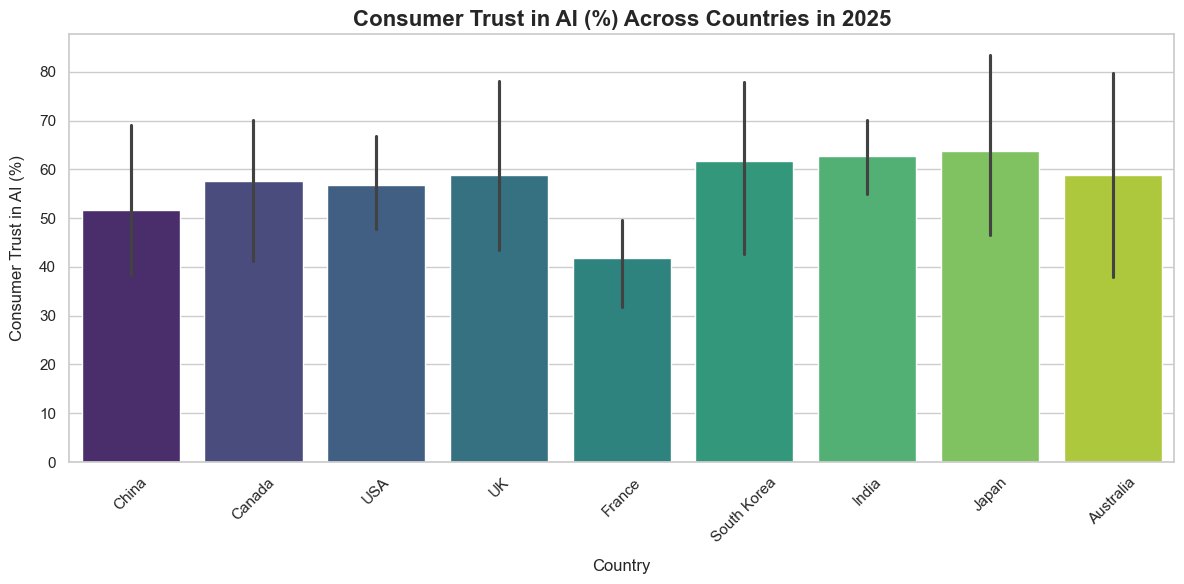

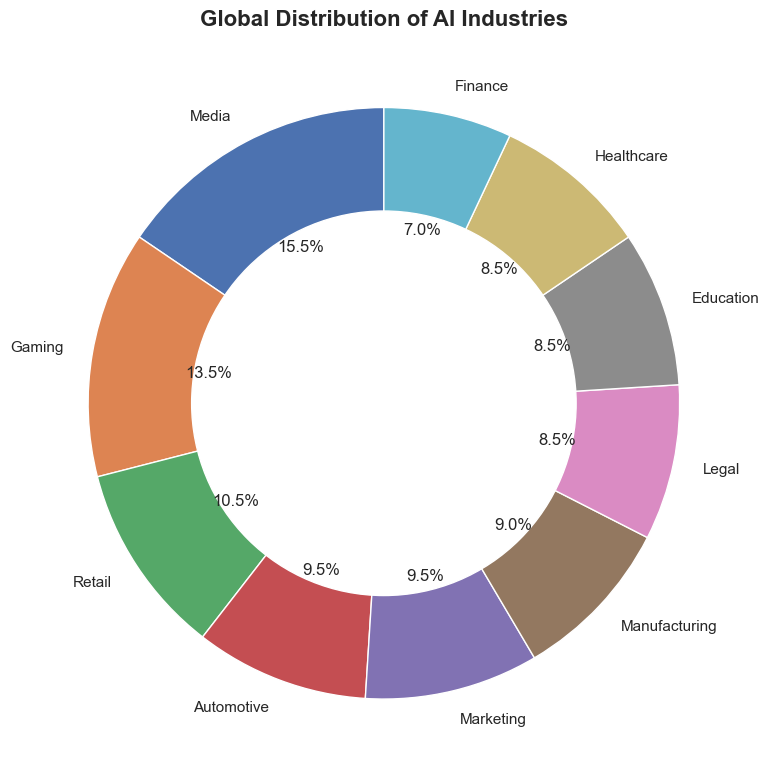

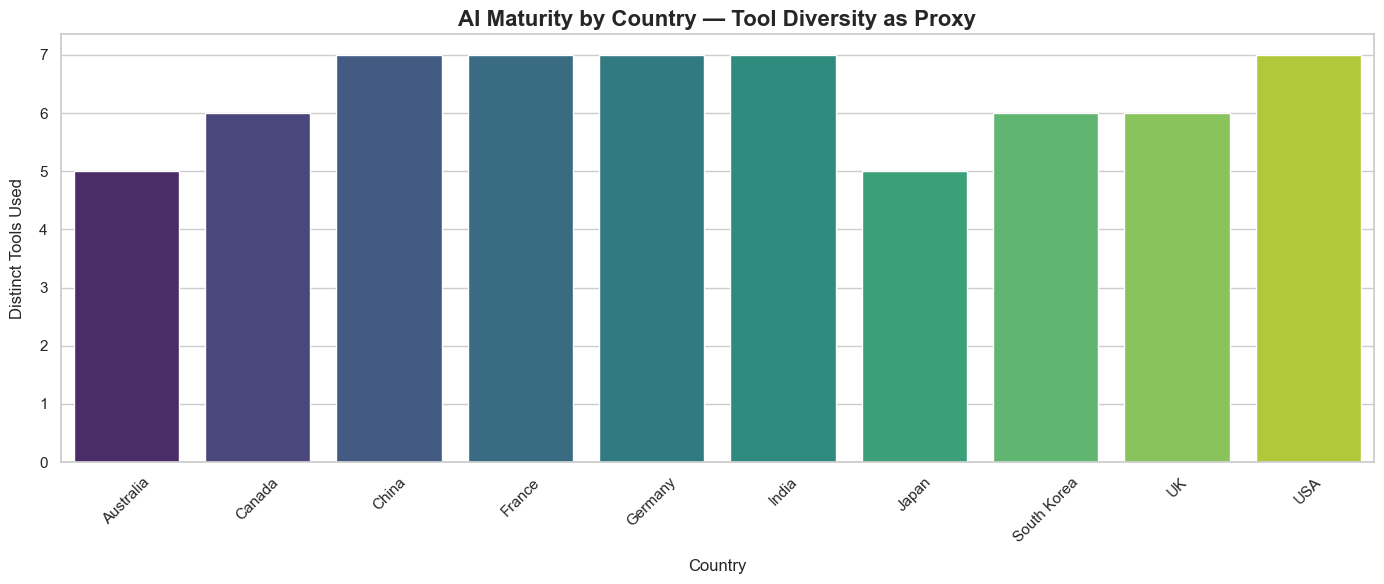

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
data = pd.read_csv("Global_AI_Content_Impact_Dataset.csv")

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelpad'] = 10

countries = data['Country'].unique()

# ----------- 1) AI Industry Adoption Across Countries (Heatmap) -----------
industry_country = data.groupby(['Country','Industry']).size().unstack(fill_value=0)
plt.figure(figsize=(14,6))
sns.heatmap(industry_country, annot=True, cmap="Blues", fmt="d")
plt.title("AI Industry Adoption Across Countries", fontsize=16, fontweight="bold")
plt.xlabel("Industry")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


# ----------- 2) Top AI Tools Usage Across Countries (Grouped Bar) -----------
tools_country = data.groupby(['Country','Top AI Tools Used']).size().reset_index(name='Count')
plt.figure(figsize=(14,6))
sns.barplot(data=tools_country, x="Country", y="Count", hue="Top AI Tools Used")
plt.title("Top AI Tools Usage Across Countries", fontsize=16, fontweight="bold")
plt.xticks(rotation=45)
plt.ylabel("Usage Count")
plt.tight_layout()
plt.show()


# ----------- 3) Evolution of AI Adoption Rate Over Years (Line Chart) -----------

latest_year = data['Year'].max()
subset = data[data['Year'] == latest_year]

change = data[data['Year']==latest_year].set_index('Country')['AI Adoption Rate (%)'] - \
         data[data['Year']==latest_year-1].set_index('Country')['AI Adoption Rate (%)']

plt.figure(figsize=(12,6))
sns.barplot(x=change.index, y=change.values, palette="coolwarm")
plt.title(f"Year-over-Year Change in AI Adoption Rate ({latest_year-1} → {latest_year})", fontsize=16, fontweight='bold')
plt.ylabel("Change (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

metric = 'Human-AI Collaboration Rate (%)'
plt.figure(figsize=(12,6))
sns.barplot(data=subset.sort_values(metric, ascending=False), x="Country", y=metric, palette="magma")
plt.title(f"{metric} Across Countries in {latest_year}", fontsize=16, fontweight='bold')
plt.ylabel(metric)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

metrics = ['AI-Generated Content Volume (TBs per year)',
           'Job Loss Due to AI (%)','Revenue Increase Due to AI (%)',
           'Consumer Trust in AI (%)']

for metric in metrics:
    plt.figure(figsize=(12,6))
    sns.barplot(data=subset, x="Country", y=metric, palette="viridis")
    plt.title(f"{metric} Across Countries in {latest_year}", fontsize=16, fontweight='bold')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# ----------- 4) Global Distribution of AI Industries (Donut) -----------
industry_dist = data['Industry'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(industry_dist, labels=industry_dist.index, autopct='%1.1f%%', startangle=90)
centre = plt.Circle((0,0), 0.65, color='white')
plt.gca().add_artist(centre)
plt.title("Global Distribution of AI Industries", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()


# ----------- 5) AI Maturity by Country (Tool Diversity Proxy) -----------
maturity = data.groupby("Country")["Top AI Tools Used"].nunique().reset_index(name="Unique Tools")
plt.figure(figsize=(14,6))
sns.barplot(data=maturity, x="Country", y="Unique Tools", palette="viridis")
plt.title("AI Maturity by Country — Tool Diversity as Proxy", fontsize=16, fontweight="bold")
plt.ylabel("Distinct Tools Used")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


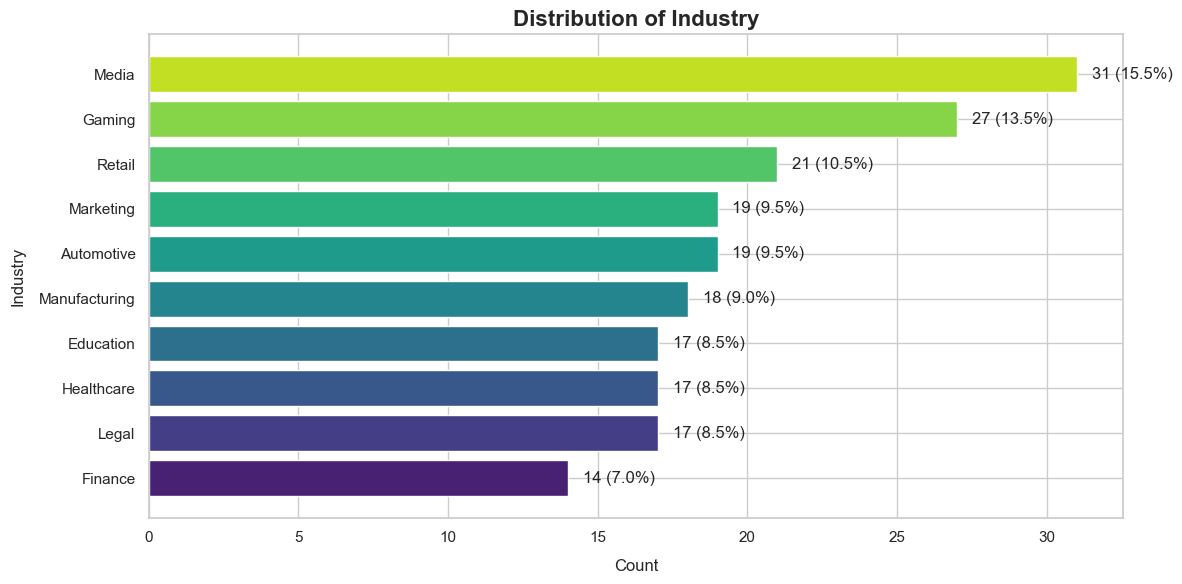

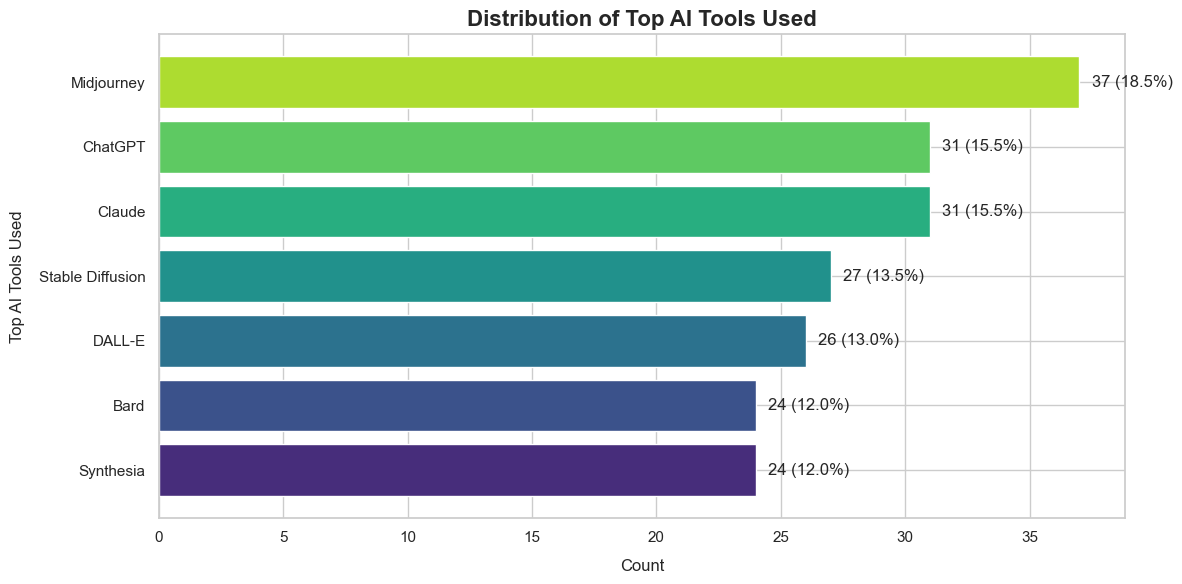

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns to visualize
categorical_cols = ['Industry', 'Top AI Tools Used']

for col in categorical_cols:
    # Count values
    counts = data[col].value_counts().sort_values(ascending=True)

    plt.figure(figsize=(12,6))
    bars = plt.barh(counts.index, counts.values, color=sns.color_palette("viridis", len(counts)))

    # Add labels on bars
    total = counts.sum()
    for bar in bars:
        width = bar.get_width()
        pct = width / total * 100
        plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{width} ({pct:.1f}%)', va='center')
    

    plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold')
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()
